#Основные понятия  
Основные понятия, касающиеся использования алгоритмов оптимизации для улучшения качества модели в машинном обучении, включают следующие аспекты:

1. Функции потерь (Loss Functions): описывают, насколько хорошо модель предсказывает данные. Различные задачи требуют использования соответствующих функций потерь, например, среднеквадратичная ошибка (Mean Squared Error, MSE) для регрессии и кросс-энтропия для классификации.

2. Алгоритмы оптимизации: методы, используемые для минимизации функции потерь, адаптируя параметры модели. Сюда входят, например, градиентный спуск, стохастический градиентный спуск (SGD), Adam и RMSprop.

3. Скорость обучения (Learning Rate): ключевой гиперпараметр в процессе обучения, который контролирует, насколько сильно мы адаптируем наши веса в ответ на оценку потерь на каждом шаге. Слишком высокая скорость обучения может привести к расходимости, слишком низкая — к замедлению обучения.

##Задание 1

Загрузите датасет и проведите первичный анализ данных. Сделайте выводы и проверьте наблюдается ли дисбаланс классов в нашем наборе данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [2]:
df = pd.read_csv('dataset_heart.csv')
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [4]:
print("Количество пропущенных значений:")
print(df.isnull().sum())

Количество пропущенных значений:
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64


In [5]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


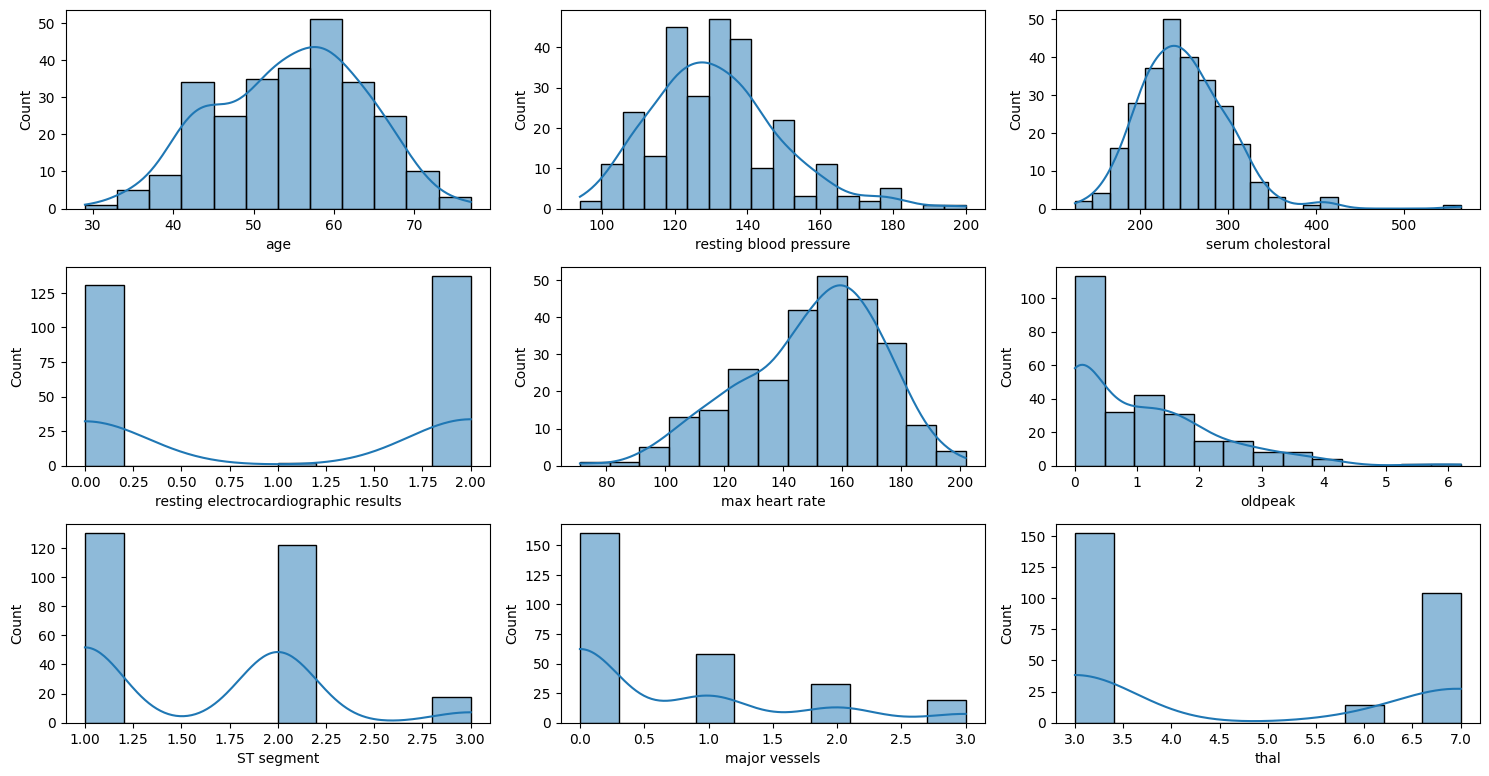

In [6]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(['age', 'resting blood pressure', 'serum cholestoral',
                   'resting electrocardiographic results','max heart rate',
                    'oldpeak', 'ST segment', 'major vessels', 'thal'], 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

In [7]:
df['heart disease'].value_counts()

heart disease
1    150
2    120
Name: count, dtype: int64

Стандартизируем наши данные и раздели на обучающую и тестовую выборки

In [8]:
X = df.drop('heart disease', axis=1)
Y = df['heart disease']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [9]:
X_train.shape, X_test.shape

((216, 13), (54, 13))

##Задание 2

Реализация логистической регрессии с использованием numpy:
Реализация класса логистической регрессии, используя SGD:
1. Оформите код логистической регрессии в виде класса `LogisticRegression`, включающего в себя методы для обучения модели и предсказания меток классов.
2. Метод `fit` должен обучать модель, принимая на вход обучающие данные и параметры обучения.
3. Метод `predict` должен использовать обученные веса модели для вычисления и возвращения предсказанных меток классов для нового набора данных. Также метод `score` для проверки качества модели
4. Дополнительно реализуйте метод `predict_proba`, который будет возвращать вероятности классов для новых данных на основе обученных весов.
5. Обучите свою модели и сравните результаты с `LogisticRegression` из `sklearn`

In [67]:
import numpy as np
import time

class MyLogisticRegression:
    def __init__(self, epoch=1000, learning_rate=0.05, learn_method='sgd', stop_rate=0.0001):
        self.epoch = epoch  # количество итераций
        self.learn_method = learn_method  # тип метода обучения
        self.learning_rate = learning_rate  # шаг обучения
        self.stop_rate = stop_rate  # параметр остановки
        self.weights = None  # веса модели

    def fit(self, X, Y):
        X = self.add_ones(X)
        Y = np.reshape(Y, (len(Y), 1))
        self.weights = np.zeros((X.shape[1], 1))

        # Выбор метода обучения
        if self.learn_method == 'sgd':
            self.learn_sgd(X, Y)

    def learn_sgd(self, X, Y):
        for _ in range(self.epoch):
            idx = np.random.randint(0, X.shape[0])
            X_i = X[idx].reshape(1, -1)
            Y_i = Y[idx].reshape(1, -1)
            preds = self.sigmoid(np.dot(X_i, self.weights))
            self.weights -= self.learning_rate * np.dot(X_i.T, (preds - Y_i))

    def predict(self, X):
        # Добавление единицы для учета bias на этапе предсказания, если нужно
        X = self.add_ones(X)
        # Применение модели
        probs = self.sigmoid(np.dot(X, self.weights))
        return [1 if i > 0.5 else 0 for i in probs]

    def predict_proba(self, X):
        X = self.add_ones(X)
        return self.sigmoid(np.dot(X, self.weights))

    def add_ones(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)



In [68]:
mlg = MyLogisticRegression()
mlg.fit(X_train, y_train)
pred = mlg.predict(X_test)
mlg.score(X_test, y_test)

0.5185185185185185

In [69]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9074074074074074

##Задание 3

 - Реализуйте модификации градиентного спуска, такие как RMSPROP, ADAM, NADAM. Обучите логистическую регрессию этими методами. Посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов. Сравните время обучения и полученные результаты.
- Добавьте в класс возможность подсчитать время обучения и количество интераций
 - Методы добавьте в уже имеющийся класс.

RMSPROP
\begin{align}
    G_{k+1} &= \gamma G_k + (1 - \gamma)(\nabla f(x_k))^2 \\
    x_{k+1} &= x_k - \frac{\alpha}{\sqrt{G_{k+1} + \varepsilon}} \nabla f(x_k).
\end{align}


ADAM
\begin{align}
    v_{k+1} &= \beta_1 v_k + (1 - \beta_1) \nabla f(x_k) \\
    G_{k+1} &= \beta_2 G_k + (1 - \beta_2)(\nabla f(x_k))^2 \\
    x_{k+1} &= x_k - \frac{\alpha}{\sqrt{G_{k+1} + \varepsilon}} v_{k+1}.
\end{align}

NADAM
 $$\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{\hat{v}_{t}}+\epsilon}\left(\beta_{1}\hat{m}_{t} + \frac{(1-\beta_{t})g_{t}}{1-\beta^{t}_{1}}\right)$$

In [70]:
import numpy as np
import pandas as pd
import time

class MyLogisticRegression:
    def __init__(self, epoch=1000, learning_rate=100, learn_method='gd', stop_rate=0.001):
        self.epoch = epoch
        self.learn_method = learn_method
        self.learning_rate = learning_rate
        self.stop_rate = stop_rate

        self.weights = None
        self.epoch_passed = 0
        self.learn_time = 0

        # Выбор метода обучения
        if self.learn_method == 'gd':
            self.learn_func = self.learn_gd
        elif self.learn_method == 'rmsprop':
            self.learn_func = self.learn_rmsprop
        elif self.learn_method == 'adam':
            self.learn_func = self.learn_adam
        elif self.learn_method == 'nadam':
            self.learn_func = self.learn_nadam
        else:
            raise Exception('Unknown learning method: {}'.format(self.learn_method))

    def init_weights(self, X):
        # Инициализация весов нулями
        return np.zeros((X.shape[1], 1))

    def fit(self, X, Y):
        # Убедимся, что X и Y являются массивами NumPy
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values.reshape(-1, 1)  # Преобразование Y в правильную форму

        X = self.add_ones(X)
        W = self.init_weights(X)

        start = time.perf_counter()
        self.learn_func(X, Y, W)
        self.learn_time = time.perf_counter() - start

    def score(self, X, Y):
        predictions = self.predict(X)
        # Если Y — pandas.Series, преобразуем его в numpy массив с помощью .values и используем .ravel() для приведения к одномерному виду
        if isinstance(Y, pd.Series):
            Y = Y.values.ravel()
        correct_predictions = (predictions == Y).sum()
        return correct_predictions / len(Y)


    def n_iter(self):
        return self.epoch_passed

    def time(self):
        return self.learn_time

    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        X = self.add_ones(X)
        return self.sigmoid_linear_regression(X, self.weights)

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

    def add_ones(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def learn_gd(self, X, Y, W):
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            W -= self.learning_rate * gradients
            self.epoch_passed += 1

        self.weights = W


    def learn_rmsprop(self, X, Y, W):
        cached_rmsprop = np.zeros_like(W)
        decay_rate = 0.9
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            cached_rmsprop = decay_rate * cached_rmsprop + (1 - decay_rate) * gradients ** 2
            W -= (self.learning_rate * gradients) / (np.sqrt(cached_rmsprop) + 1e-6)
            self.epoch_passed += 1

        self.weights = W
    def learn_adam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)
            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)

            W -= self.learning_rate * m_corrected / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W

    def learn_nadam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)

            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)
            m_hat = beta1 * m_corrected + (1 - beta1) * gradients / (1 - beta1 ** t)

            W -= self.learning_rate * m_hat / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W


    def cost_binary_cross_entropy(self, X, Y, W):
        m = X.shape[0]
        h = self.sigmoid_linear_regression(X, W)
        return -(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    def gradient(self, X, Y, W):
        m = X.shape[0]
        return (1 / m) * np.dot(X.T, self.sigmoid_linear_regression(X, W) - Y)

    def sigmoid_linear_regression(self, X, W):
        return 1 / (1 + np.exp(-np.dot(X, W)))



In [71]:
results = pd.DataFrame(columns=['Method','Score','Iterations','Time'])

In [72]:
from sklearn.linear_model import LogisticRegression

start = time.perf_counter()

# SKLEARN с установками по-умолчанию
my_model = LogisticRegression(max_iter=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter_[0]
my_time = time.perf_counter() - start
print(f"SKLEARN DEFAULT score is: {my_score}")
print(f"SKLEARN DEFAULT iter number: {my_iter}")
print(f"SKLEARN DEFAULT time: {my_time} sec")
results.loc[len(results)] = ['SKLEARN DEFAULT',my_score,my_iter,my_time]

SKLEARN DEFAULT score is: 0.9074074074074074
SKLEARN DEFAULT iter number: 12
SKLEARN DEFAULT time: 0.009590674999969906 sec


In [73]:
my_model = MyLogisticRegression(learn_method='gd',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"GD score is: {my_score}")
print(f"GD iter number: {my_iter}")
print(f"GD time: {my_time} sec")
results.loc[len(results)] = ['MY GD',my_score,my_iter,my_time]

GD score is: 28.72222222222222
GD iter number: 2000
GD time: 0.054860231000020576 sec


<ipython-input-70-8cdd8b13970f>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


In [74]:
my_model = MyLogisticRegression(learn_method='rmsprop',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"RMSPROP score is: {my_score}")
print(f"RMSPROP iter number: {my_iter}")
print(f"RMSPROP time: {my_time} sec")
results.loc[len(results)] = ['MY RMSPROP',my_score,my_iter,my_time]

RMSPROP score is: 15.88888888888889
RMSPROP iter number: 2000
RMSPROP time: 0.08112023099999988 sec


<ipython-input-70-8cdd8b13970f>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


In [75]:
# ADAM
my_model = MyLogisticRegression(learn_method='adam',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"ADAM score is: {my_score}")
print(f"ADAM iter number: {my_iter}")
print(f"ADAM time: {my_time} sec")
results.loc[len(results)] = ['MY ADAM',my_score,my_iter,my_time]

<ipython-input-70-8cdd8b13970f>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


ADAM score is: 15.88888888888889
ADAM iter number: 2000
ADAM time: 0.09612776100004794 sec


In [76]:
# NADAM
my_model = MyLogisticRegression(learn_method='nadam',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"NADAM score is: {my_score}")
print(f"NADAM iter number: {my_iter}")
print(f"NADAM time: {my_time} sec")
results.loc[len(results)] = ['MY NADAM',my_score,my_iter,my_time]

<ipython-input-70-8cdd8b13970f>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


NADAM score is: 15.88888888888889
NADAM iter number: 2000
NADAM time: 0.10564580700003035 sec


In [77]:
results

,Method,Score,Iterations,Time
0,SKLEARN DEFAULT,0.907407,12,0.009591
1,MY GD,28.722222,2000,0.054860
2,MY RMSPROP,15.888889,2000,0.081120
3,MY ADAM,15.888889,2000,0.096128
4,MY NADAM,15.888889,2000,0.105646


##Домашнее задание

Задание
1. Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD - модель SGDClassifier библиотека sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском (используйте логистическую регрессию).

3. Сравнить разные алгоритмы оптимизации.
- Обучитe модель логистической регрессии на этих данных, используя разные оптимизаторы, и сравните их эффективность.
Используйте параметр `solver`, который может принимать значения:
  - 'liblinear': использует координатный спуск (Coordinate Descent, CD). Хорошо подходит для небольших датасетов.
  - 'lbfgs': аппроксимация метода Бройдена – Флетчера – Гольдфарба – Шанно (BFGS). Рекомендуется для небольших и средних датасетов.
  - 'newton-cg': Ньютоновский метод сопряженных градиентов. Требует много ресурсов для больших датасетов из-за необходимости вычисления матрицы Гессе.
  - 'sag': Стохастический градиентный спуск с использованием среднего градиента. Подходит для больших датасетов.
  - 'saga': Расширение 'sag', поддерживает L1-регуляризацию, такое сочетание регуляризаций делает его вариацией метода Elastic Net.